In [1]:
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from imgo import uptools
from imgo import augtools

In [3]:
%%time
ds = uptools.Image_Dataset("data/img_data", "imgs", 220)

Processing X_data: 100%|██████████| 10831/10831 [00:01<00:00, 7511.51it/s]


Compiling datasets...
Image_Datset initialized successfully.
CPU times: user 1min 27s, sys: 12.8 s, total: 1min 40s
Wall time: 1min 53s


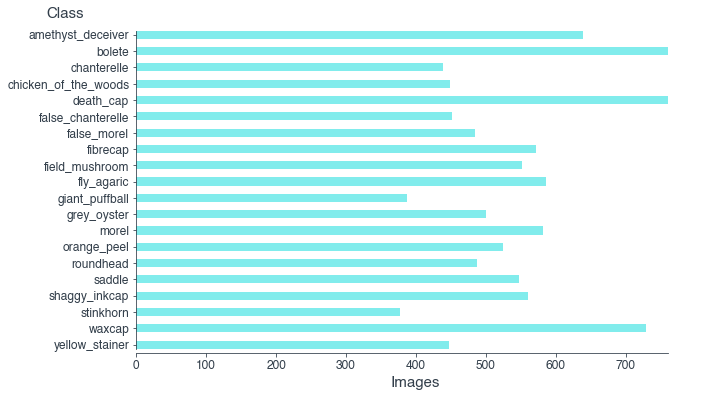

In [4]:
ds.details(plot=True)

In [5]:
aug = augtools.Augmenter(pwa_scale=(0.05,0.075),
                         e_sev=3,
                         g_sev=2,
                         b_sev=2,
                         contrast=True,
                         clip_limit=(1,3),
                         dropout_pair=(0.15,0.85),
                         x_scale=(0.7,1.3),
                         y_scale=(0.7,1.05),
                         shear_range=(-20,20),
                         x_shift=(-0.05,0.05),
                         y_shift=(-0.1,0.1),
                         rotate_range=(-30,30),
                         v_flip=0.5,
                         h_flip=0.5,
                         sharpness=True,
                         fill_mode="reflect",
                         randomize_params=True)

In [6]:
%%time
ds.split_rebalance((0.8,0.1,0.1),
                   augmenter=aug,
                   augment_scale=700,
                   augment_type="simple",
                   order=[7,4,5,0,2,1,3,12,14,10,13,15,8,11,6,9])

Rebalancing: 100%|██████████| 7969/7969 [5:20:24<00:00,  2.41s/it]  


Data sucessfully rebalanced and split into training, validation, and testing subsets.
CPU times: user 3h 42min 8s, sys: 1h 52min 44s, total: 5h 34min 52s
Wall time: 5h 21min 12s


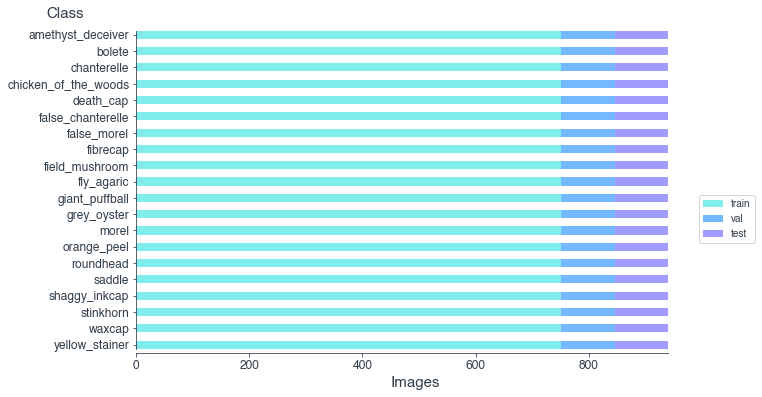

In [7]:
ds.details(plot=True)

In [8]:
ds.save_arrays("deepshroom_data")

imgo_output/uptools/save_arrays/deepshroom_data/X_train.h5 saved successfully.
imgo_output/uptools/save_arrays/deepshroom_data/y_train.h5 saved successfully.
imgo_output/uptools/save_arrays/deepshroom_data/X_val.h5 saved successfully.
imgo_output/uptools/save_arrays/deepshroom_data/y_val.h5 saved successfully.
imgo_output/uptools/save_arrays/deepshroom_data/X_test.h5 saved successfully.
imgo_output/uptools/save_arrays/deepshroom_data/y_test.h5 saved successfully.
